In [15]:
import datetime
import pandas_datareader.data as web
from sarimaxModel import sarimaxPrdict
from sarimaxModel import quickParameters
from sarimaxModel import selectParameters
from sarimaxModel import predictbyticker
import pandas as pd
from sarimaxModel import forcastStocks
from loadstocks import loadStocksByTickers
from loadstocks import loadAuNotNaTickersFromYahooExcel
from sarimaxModel import predictbyticker
import pandas as pd
from sarimaxModel import forcastStocks
from loadstocks import loadStocksByTickers
from loadstocks import loadAuNotNaTickersFromYahooExcel
# We will look at stock prices over the past year, starting at January 1, 2016


ticker='WEB.AX'
months=12
end = datetime.date.today()
day=end.day
year=end.year-months//12-1
month=months%12+1
start=datetime.datetime(year,month,day)

data=web.DataReader(ticker,"yahoo",start,end)['Adj Close']   

#y=data.resample('MS').mean()

#parameters=quickParameters(paramPath,ticker,y,steps=2,disp=False)
#parameters=selectParameters(ticker,y,steps=2,disp=True)
#['8CO.AX', 0, 0, 0, 0, 0, 0, 12, 't', -7.909122119923726, 0.03528654153968552]

#parameters=['MFG.AX', 0, 0, 1, 0, 1, 0, 12, 'n', 321.3071720270583, 0.486377988114156]
#data=data['2019-04-01':]

In [16]:
y=data.resample('W').mean()
steps=1
#parameters=quickParameters(paramPath,ticker,y,steps=2,disp=False)
parameters=selectParameters(ticker,y,steps=steps,disp=False)

['WEB.AX', 1, 0, 1, 1, 0, 1, 12, 't', 188.65530721886577, 0.0008631961279128575]


In [17]:
y=data.resample('C').mean()
import statsmodels.api as sm
import os
# SARIMAX example
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pylab as plt
from sklearn.metrics import mean_squared_error

parameters=['ppt',0, 1, 1, 0, 1, 0, 12, 'c', 326.76616829469526, 0.011332736767066365]
train_y, test_y = y[:-steps], y[-steps:]

p1,p2,t=parameters[1:4],parameters[4:8],parameters[8]
print(p1,p2,t)
model = SARIMAX(train_y,
     order=p1,
     seasonal_order=p2,
     trend=t,
     enforce_stationarity=False,
     enforce_invertibility=False)

model_fit = model.fit(disp=False)

forcast=model_fit.forecast(steps=len(test_y))



[0, 1, 1] [0, 1, 0, 12] c


Date
2017-01-26    10.517467
2017-01-27    10.611534
2017-01-30    10.611534
2017-01-31    10.696145
2017-02-01    10.724413
2017-02-02    10.743227
2017-02-03    10.771398
2017-02-06    10.677331
2017-02-07    10.818480
2017-02-08    10.771398
2017-02-09    10.818480
2017-02-10    10.884277
2017-02-13    10.865464
2017-02-14    10.827838
2017-02-15    10.987799
2017-02-16    10.818480
2017-02-17    10.827838
2017-02-20    10.837292
2017-02-21    10.846652
2017-02-22    11.044238
2017-02-23    10.959531
2017-02-24    10.912545
2017-02-27    10.630347
2017-02-28    10.479840
2017-03-01    10.555094
2017-03-02    10.517467
2017-03-03    10.536281
2017-03-06    10.573907
2017-03-07    10.376321
2017-03-08    10.310425
                ...    
2019-04-15    15.780000
2019-04-16    16.150000
2019-04-17    16.610001
2019-04-18    16.549999
2019-04-19          NaN
2019-04-22          NaN
2019-04-23    16.650000
2019-04-24    16.790001
2019-04-25          NaN
2019-04-26    16.740000
2019-04-29 

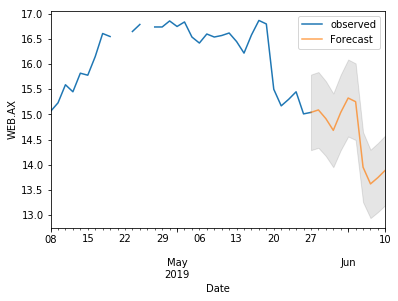

In [18]:
print(train_y)
print(test_y)
print(forcast) 
if( len(parameters)>0):
    
    p1,p2,t=parameters[1:4],parameters[4:8],parameters[8]
    result=sarimaxPrdict(ticker,y,p1,p2,t,steps=10,disp=True,days=50)
else:
    print("wrong parameters",len(parameters))

In [19]:
result
sres=pd.DataFrame()
sres[ticker]=result
sres

,WEB.AX
2019-05-27,15.040000
2019-05-28,15.088881
2019-05-29,14.915644
2019-05-30,14.682405
2019-05-31,15.039168
2019-06-03,15.325932
2019-06-04,15.252693
2019-06-05,13.949457
2019-06-06,13.616220
2019-06-07,13.742982


In [20]:
sres=sres.transpose()
rate=sres[sres.columns[-1]]/sres[sres.columns[0]]
rate
dd=pd.DataFrame()
x=rate*500-500
dd['benefit']=x
dd['rate']=rate
dd[sres.columns[-0]]=sres[sres.columns[-3]]
dd[sres.columns[-2]]=sres[sres.columns[-2]]
dd[sres.columns[-1]]=sres[sres.columns[-1]]


dd.sort_values(by='benefit',ascending=False).head(300)


,benefit,rate,2019-05-27 00:00:00,2019-06-07 00:00:00,2019-06-10 00:00:00
WEB.AX,-38.239866,0.92352,13.61622,13.742982,13.889745
